# Morphological operations

This part of the course is about operations to analyse shapes and form of objects.

Run the code making sure you understand the syntax. Complete the parts marked **TODO** either in the text or in the code.

## Setup

First, we need to import some packages so that their functions are available to us.

In [205]:
import os                       # operating system operations like file paths etc
import numpy as np              # multidimensional arrays, linear algebra
from skimage import morphology  # morphological operations
from skimage import io          # to load and save data
from skimage import color       # color conversion utilities
from skimage.util import invert   # invert an image (if binary, black->white, white->black)
from skimage import img_as_ubyte # Convert an image to 8-bits
from skimage.filters import threshold_otsu # Otsu's thresholding method
import matplotlib.pyplot as plt # plotting


path_to_images= '../data'    # where the images are relative to this notebook. On Nuvolos, you may need to provide an absolute path

## Data loading and exploration

The data for this notebook is from the [Munich AML Morphology Dataset](https://www.cancerimagingarchive.net/collection/aml-cytomorphology_lmu/), which consists of single-cell images taken from blood of patients with Acute Myeloid Leukemia at the Münich University Hospital, using a digital microscope. Here, we're using an image of a basophil, a type of white blood cell (leukocyte).

So, let's load the image and look at it.

Text(0.5, 1.0, 'Original image')

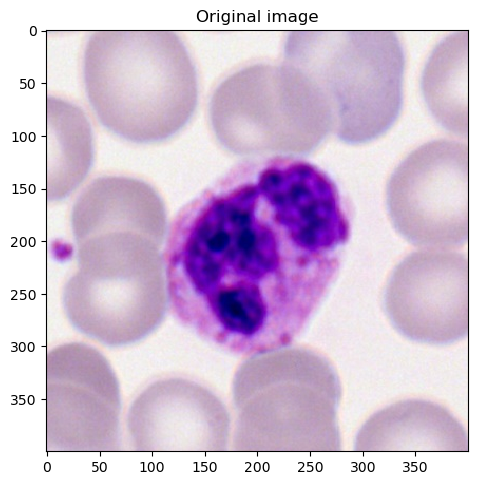

In [203]:
# Load the Basophil image
image_file = os.path.join(path_to_images, 'BAS_0001.tiff')
img = io.imread(image_file)
#print(img.shape)
img = np.delete(img,3,2) # remove the last channel (alpha)
#print(img.shape)

# Display the image
plt.figure()
io.imshow(img)
plt.title('Original image')

## Image preprocessing

Morphological operations typically work on binary data (zeros = black pixels and ones = white pixels ), but here we have a color image. So let's convert to grayscale first, and then binarize the image.

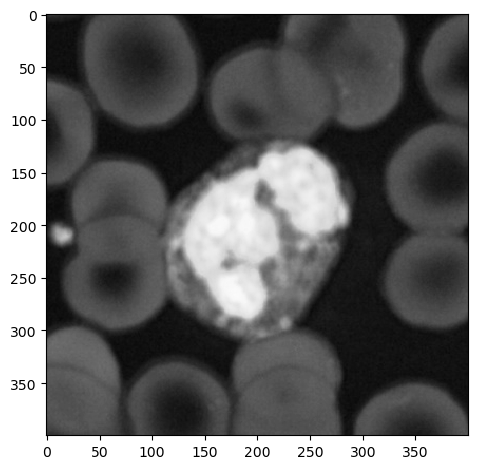

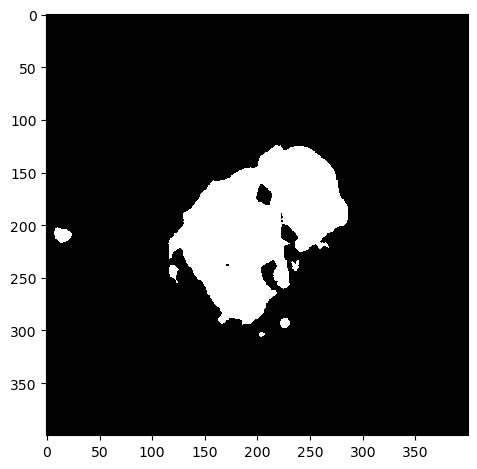

0.5182801715686274


In [207]:

# Convert image to grayscale
gray_img = color.rgb2gray(img)
gray_img = invert(gray_img) # invert the image so that the cells are white
io.imshow(gray_img)
io.show()

# Binarize the grayscale image with a threshold
threshold = 0.4          # TODO Experiment with this your desired threshold value
binary_img = gray_img > threshold
io.imshow(binary_img)
io.show()

# TODO try Otsu thresholding



**TODO**: Experiment with changing the threshold between 0 and 1, and observe the results. What happens with a threshold at 0.3? 0.4? 0.5? 0.6 ?

As you can see, it's not trivial to get the right threshold that shows only the basophil we are interested in, in the center of the image.

**TODO**: use Otsu thresholding from the scikit-image `filters` module, read the documentation [here](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu)

## Structuring Elements

Let's examine how to create and display structuring elements.
The doc for this part is found in [skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html). Note that skimage calls SEs "footprints".

Created structuring element of shape (3, 3)


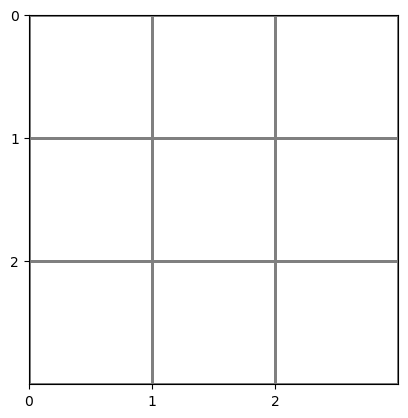

In [80]:
# Let's  create a 3x3 square structuring element (SE). The set of the SE are the pixels that are 1.
se_size=3
my_se=morphology.square(se_size)
print(f'Created structuring element of shape {my_se.shape}') # SEs are just numpy arrays

# Display SE with pixel boundaries
plt.pcolormesh(my_se, edgecolors='gray', linewidth=2, vmin=0, vmax=1,cmap='gray')
plt.xticks(np.arange(0, my_se.shape[1]))
plt.yticks(np.arange(0, my_se.shape[0]))
ax = plt.gca()
ax.set_aspect('equal')  # make image square
ax.invert_yaxis()       # match numpy convention top left is (0,0)






**TODO** create a disk SE (morphology.disk) and display it. Copy-paste the code from above and modify it.

## Erosion

We have a binary image, we have a structuring element, let's try eroding the image!


SE
[[1 1 1]
 [1 1 1]
 [1 1 1]]


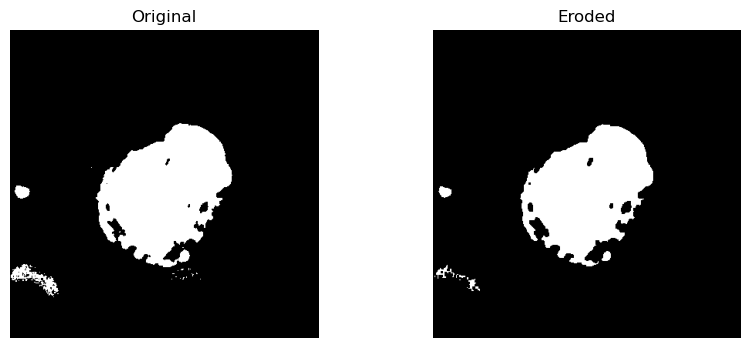

The eroded image has 19665 white pixels


In [101]:
# create a square 3x3 SE
se_size=3
my_se=morphology.square(se_size)
print('SE')
print(my_se)


# Erode the binary image with the SE
eroded_img = morphology.binary_erosion(binary_img, footprint=my_se)

# look at the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(binary_img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(eroded_img, cmap='gray')
ax2.set_title('Eroded')
ax2.axis('off')

plt.show()

print(f'The eroded image has {np.count_nonzero(eroded_img)} white pixels')




**TODO**: experiment with various sizes of the structuring element (3,4,5,6...), as well as shapes. What works best to remove small blobs while preserving most of the basophil?

**TODO**: go back to your threshold choice. What is your optimal combination of threshold, SE shape, and SE size to recover most of the basophil, and the basophil alone? 

## Dilation

We have seen that you can remove unwanted blobs with erosion. Now let's try dilation.

SE
[[1 1 1]
 [1 1 1]
 [1 1 1]]


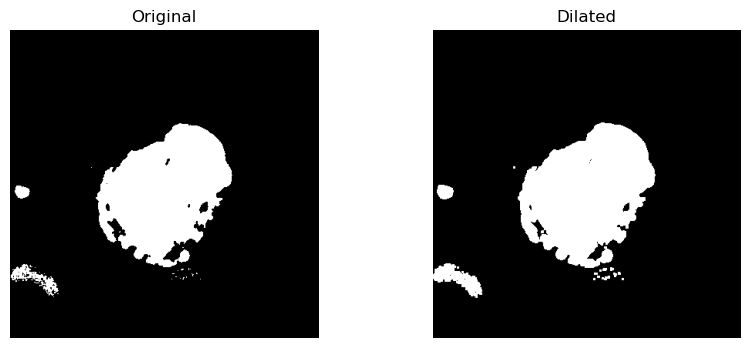

The dilated image has 23593 white pixels


In [100]:
# create a square 3x3 SE
se_size=3
my_se=morphology.square(se_size)
print('SE')
print(my_se)


# Dilate the binary image with the SE
dilated_img = morphology.binary_dilation(binary_img, footprint=my_se)

# look at the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(binary_img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(dilated_img, cmap='gray')
ax2.set_title('Dilated')
ax2.axis('off')

plt.show()

print(f'The dilated image has {np.count_nonzero(dilated_img)} white pixels')


**TODO**: experiment with various sizes of the structuring element (3,4,5,6...), as well as shapes. What works best to close the holes in the basophil?

**TODO**: go back to your threshold choice. What is your optimal combination of threshold, SE shape, and SE size to recover most of the basophil, and the basophil alone? 

Now, we can try to estimate the size of the basophil. We can count the number of white pixels (non-zero) as already implemented in the code above. 

**TODO** Assuming the basophil is circular, that all pixels are part of the basophil, and using the formula `A = $\pi r^2$', where A is the area or surface, do you have enough data to estimate the diameter of the basophil (typically around 15 $\mu m$) ? Why or why not?

## Opening
Opening allows us to remove small objects from the foreground while preserving the size of the object of interest.

SE
[[1 1 1]
 [1 1 1]
 [1 1 1]]


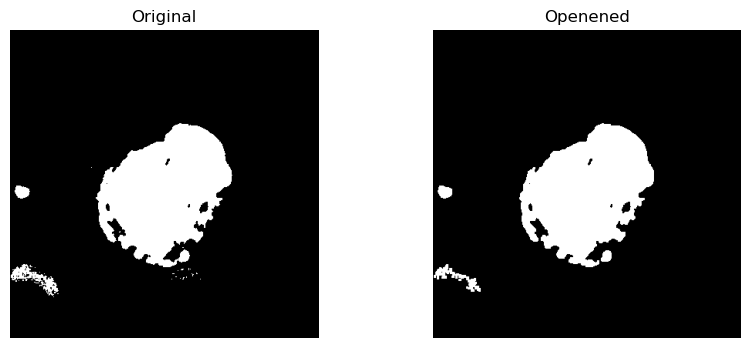

The Opened image has 21278 white pixels


In [106]:
# create a square 3x3 SE
se_size=3
my_se=morphology.square(se_size)
print('SE')
print(my_se)


# Open the binary image with the SE
opened_img = morphology.binary_opening(binary_img, footprint=my_se)

# look at the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(binary_img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(opened_img, cmap='gray')
ax2.set_title('Opened')
ax2.axis('off')

plt.show()

print(f'The Opened image has {np.count_nonzero(opened_img)} white pixels')

**TODO**: experiment with various sizes of the structuring element (3,4,5,6...10), as well as shapes (disk). What works best to remove spurious parts of basophil and 'repair' the cell?

**TODO**: go back to your threshold choice. What is your optimal combination of threshold, SE shape, and SE size to recover most of the basophil, and the basophil alone? 

**TODO** Compare the results with those from the erosion operator, qualitatively and quantitatively (number of white pixels). What do you notice?


## Closing

Closing enables us to close small holes that we don't want in foreground objects

SE
[[1 1 1]
 [1 1 1]
 [1 1 1]]


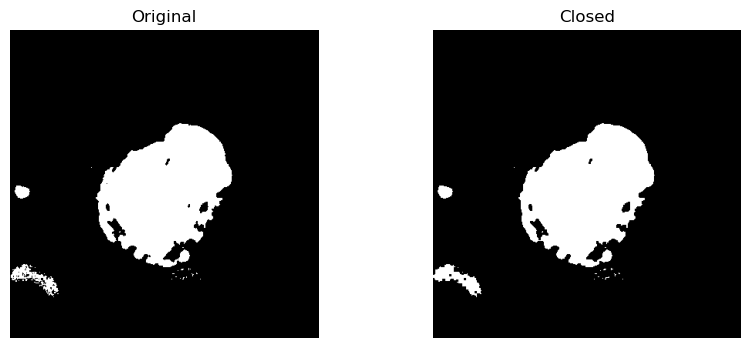

The Closed image has 21865 white pixels


In [107]:
# create a square 3x3 SE
se_size=3
my_se=morphology.square(se_size)
print('SE')
print(my_se)


# Open the binary image with the SE
closed_img = morphology.binary_closing(binary_img, footprint=my_se)

# look at the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(binary_img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(closed_img, cmap='gray')
ax2.set_title('Closed')
ax2.axis('off')

plt.show()

print(f'The Closed image has {np.count_nonzero(closed_img)} white pixels')

**TODO**: experiment with various sizes of the structuring element (3,4,5,6...10), as well as shapes (disk). What works best to close holes in the basophil?

**TODO**: go back to your threshold choice. What is your optimal combination of threshold, SE shape, and SE size to recover most of the basophil, and the basophil alone? 

**TODO** Compare the results with those from the dilation operator, qualitatively and quantitatively (number of white pixels). What do you notice?


## Top hat transform

We can use the top hat transform to apply an SE that does NOT match the structures we want to keep. For example, we could want to recover the other cells rather than the big basophil in the center. We know that the basophil will not match a small SE. So let's use a white top hat (WTH) to remove it.

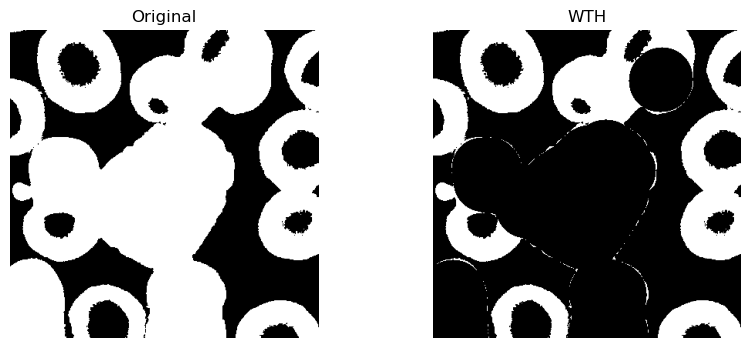

The WTH image has 46328 white pixels


In [154]:
# Binarize the grayscale image with a threshold, this time with a lower threshold to keep more of the cells apart from the basophil
threshold = 0.2        # Experiment with this your desired threshold value
binary_img_TH = gray_img > threshold


# create a disk size 10 SE
se_size=10
y_se=morphology.disk(se_size)
#print('SE')
#print(my_se)


# Open the binary image with the SE
WTH_img = morphology.white_tophat(binary_img_TH, footprint=my_se)

# look at the result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(binary_img_TH, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(WTH_img, cmap='gray')
ax2.set_title('WTH')
ax2.axis('off')

plt.show()

print(f'The WTH image has {np.count_nonzero(WTH_img)} white pixels')

**TODO**: experiment with various sizes of the structuring element (3,4,5,6...10), as well as shapes and threshold. What works best to remove the basophil ? 


## Dealing with grayscale images

So far we've only dealt with binary images (black and white, all pixels 0 or 1), by thresholding grayscale images. But you can also apply morphological operators to grayscale images (e.g. that have pixel values from 0 to 255 for an 8-bit image). This requires a small change in the definition of the opening and closing operations, but the principles stay very much the same.

Here we show just the outline, but not that in practical implementation there will not be explicit thresholding at each level, which is inefficient computationally. 
In scikit-image, you can just use directly the grayscale equivalent functions such as `closing()` instead of `binary_closing()` etc.

Principle:
1. Apply multiple thresholds to obtain a level set for each threshold
2. Use binary morphological operations on each level set
3. Reconstruct result via maximum operation


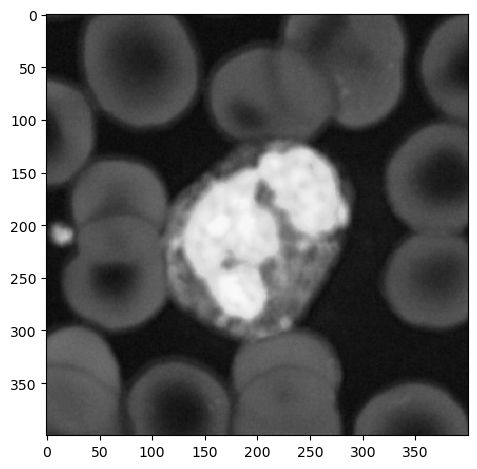

There are 244 distinct thresholds
We will use these thresholds to build level sets: [ 19.  68. 128. 189. 238.]


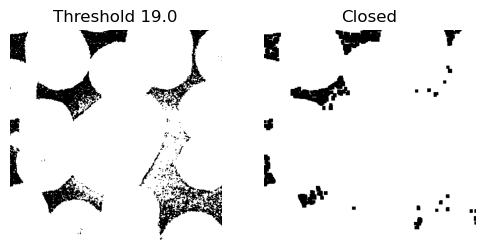

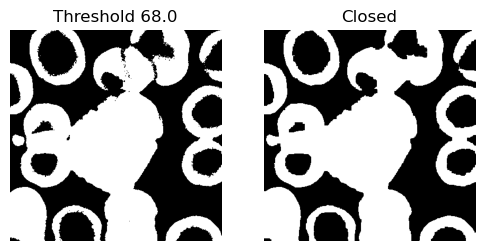

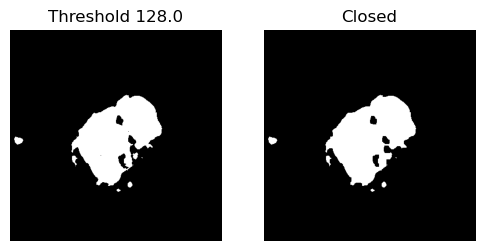

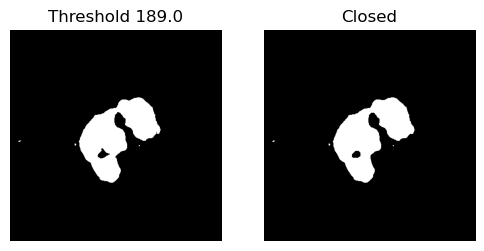

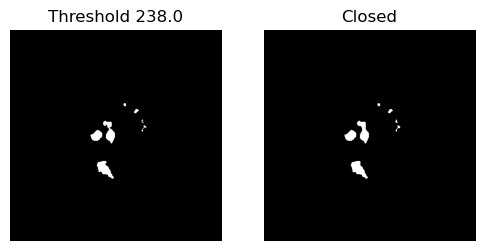

In [124]:
# create a square 6x6 SE
se_size=6
my_se=morphology.square(se_size)


# Convert the grayscale image to 8-bits to save time
# Assuming you have a grayscale image stored in the variable 'gray_img'
gray_img_8bits = img_as_ubyte(gray_img)
io.imshow(gray_img_8bits)
io.show()

# list all possible thresholds in the grayscale image
thresholds = np.unique(gray_img_8bits)
print(f'There are {len(thresholds)} distinct thresholds')

# For illustration let's pick the only 5 thresholds across the range, defined by percentiles of thresholds distribution
percentiles = [5, 25, 50, 75, 95]
selected_thresholds = np.round(np.percentile(thresholds, percentiles))
print(f'We will use these thresholds to build level sets: {selected_thresholds}')

# Run over all thresholds and compute level sets, then apply binary morphological closing
for k, threshold in enumerate(selected_thresholds):
    # threshold here to obtain the level set
    this_level_set = gray_img_8bits >= threshold
    
    # Close the binary image with the SE
    this_closed_img = morphology.binary_closing(this_level_set, footprint=my_se)

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(6, 5))
    ax1.imshow(this_level_set, cmap='gray')
    ax1.set_title(f'Threshold {threshold}')
    ax1.axis('off')
    ax2.imshow(this_closed_img, cmap='gray')
    ax2.set_title('Closed')
    ax2.axis('off')
plt.show()


## Connected components analysis

Once your image is reasonably processed, you may want to know how many "distinct" or "separate" foreground objects your image has.

For demonstration purposes, let's take an easier image than the one we've been using so far.

Found 15 connected components


(-0.5, 639.5, 511.5, -0.5)

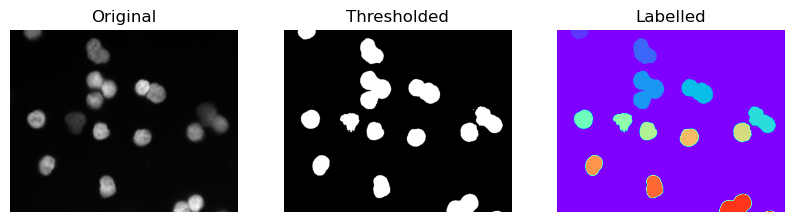

In [201]:
# Load and normalize the neuroblastoma image
image_file = os.path.join(path_to_images, 'neuroblastoma_5_orig_small.jpg')
img = io.imread(image_file)
img = img/np.max(img) # normalize the image to [0,1]

# threshold the image
threshold = 0.15
binary_img = img > threshold

# detect connected components
labeled_img, num_labels = morphology.label(binary_img, background=0, return_num=True, connectivity=1)
print(f'Found {num_labels} connected components')

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10, 7))

ax1.imshow(img, cmap='gray')
ax1.set_title(f'Original')
ax1.axis('off')
ax2.imshow(binary_img, cmap='gray')
ax2.set_title('Thresholded')
ax2.axis('off')
ax3.imshow(labeled_img, cmap='rainbow')
ax3.set_title('Labelled')
ax3.axis('off')

**TODO** Experiment with the threshold. How does the number of connected components change? What is the actual answer according to you? Can you improve upon manual thresholding with Otsu thresholding? 

## Putting it all together - brain white matter volumetry

Now you have all the tools you need to apply to another image. Here we'll look at one 2D slice of a 3D brain T1-weighted (T1w) Magnetic Resonance Image. These are used routinely in clinical settings for many brain diseases such as Multiple Sclerosis, Alzheimer disease, etc. In T1w images, cerebro-spinal fluid is dark, gray matter is a little bit brighter, white matter is brighter, and fat is even brighter.

In this exercise, we want to quantify the volume of the white matter (WM) in one slice, assuming that each voxel is 1 mm x 1 mm x 1 mm. So each pixel is 1mm x 1 mm, with slice thickness 1mm. If you have 5 voxels of WM, the WM volume is 5 ml.

255
uint8
float32


Text(0.5, 1.0, 'Tresholded white matter')

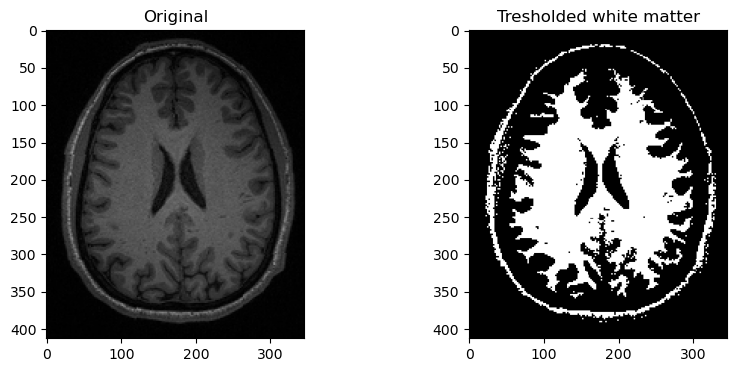

In [94]:
# Load brain image
image_file_brain = os.path.join(path_to_images, 'MRIt1w.png')
img_b = io.imread(image_file_brain)

# threshold to get only white matter
threshold = 60         # Experiment with this your desired threshold value
binary_img_b = np.array(img_b > threshold,dtype=np.float32)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.imshow(img_b, cmap='gray')
ax1.set_title('Original')

ax2.imshow(binary_img_b)
ax2.set_title('Tresholded white matter')



Now we have approximately only the white matter, but we also have a bright "ring" around the brain. This is a fat layer within the skull that is hyper-intense in T1-weighted MRI images. Using morphological operations, how could we get rid of it?

**TODO** Implement your solution below.

In [ ]:
# TODO your code goes here

Assuming you have successfully gotten rid of the 'fat ring', Try to compute the volume of the white matter in ml, then print it. Remember, 1 white pixel = 1 mm.

**TODO** Implement your solution below

In [ ]:
# TODO your code here